## 回忆我们之前的例子

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100) # 产生一个向量数据集，分布是均匀分布的
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size=100) # 对每一个值又加入了1个正太噪声

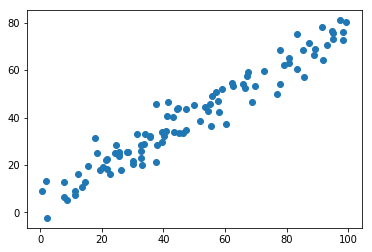

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X) # 得到n_components个主成分向量
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

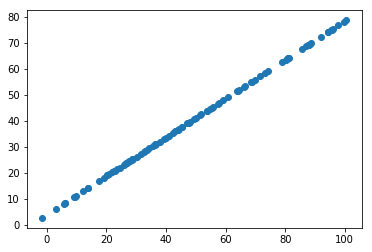

In [6]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show() # 丢失了信息，可能很大一部分是噪音
# 如何判断识别准确率呢？

### 手写识别的例子

In [7]:
# 就是有傻叉在咖啡厅吸烟，待会撤了
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data # 样本行向量是像素向量
y = digits.target

In [10]:
# 创建一个有噪音的数据集
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [15]:
# 为了直观地看到噪音
example_digits = noisy_digits[y==0, :][:10] # [:10]表示取前10个样本
for num in range(1, 10): # 1~9，因为0已经在example_digits里面了
    X_num = noisy_digits[y==num, :][:10] # 添加数字i的样本向量，每个数字取10个样本
    example_digits = np.vstack([example_digits, X_num])

In [17]:
example_digits.shape

(100, 64)

In [20]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
    plt.show()

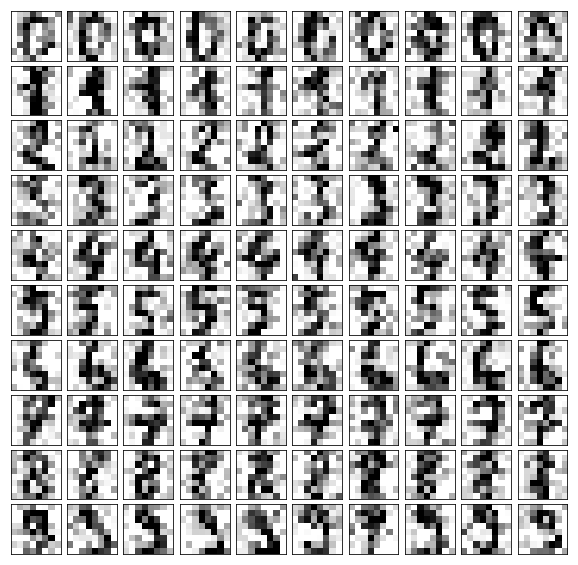

In [21]:
plot_digits(example_digits)

In [23]:
# pca降噪
pca = PCA(0.5) # 感觉噪音比较大，所以我们去掉较多的信息，里面也会包含较多的噪音信息
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.n_components_ # 保留0.5的信息量之后的主成分个数

12

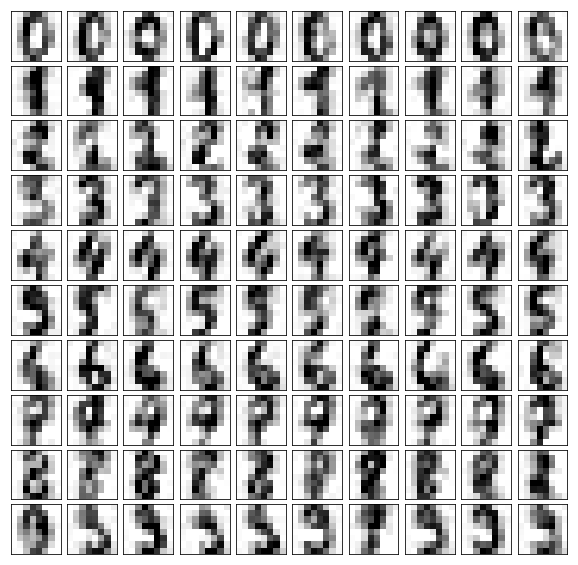

In [28]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components) # 损失的信息和噪音都没有了
plot_digits(filtered_digits)